#Introdução

Benévolo, este curso, vamos ter uma noção geral do funcionamento dos algoritmos de classificação supervisionados mais famosos que existem, que no caso são:

 - Support Vector Machines


 - Dummy Classifiers

 Cada um destes modelos tem sua particuliaridade, que vamos passar por cima... Mas devemos saber que o objetivo final de cada modelo de classificação é (Como o nome já sugere) classificar algo dentro de um possível grupo.


Antes de abordarmos cada um dos modelos de classificação, vamos aprender a ideia básica de um processo de classificação que todo modelo segue. Para exemplo, vamos fazer um modelo genérico de classificação que vai classificar um animal como sendo ou cachorro ou porco. Como estamos falando de modelos supervisionados, então teremos que ensinar para nosso modelo a partir de exemplos. Mas como começamos a ensinar nosso modelo?


#Features - Caracteristicas

Antes de ensinar qualquer modelo supervisionado, devemos saber exatamanete quais são as caracteristicas importantes que devemos ensinar para o modelo para que ele posso diferenciar um cachorro de um porco.

Isto é, se eu ensinar para meu modelo que um cachorro é aquele que tem 4 patas, quando ele começar a receber imagens de porcos ele vai classificar esse porco como cachorro... Logo veja que, devemos nos ater a caracteristica importantes de diferenciação. Essas carcateristicas importantes são chamadas de Features e é apartir delas que nosso (e qualquer outro modelo de classificação) vai aprender de forma correta e eficas.

Pensando em nosso problema, podemos definir as seguintes caracteristicas/features relevantes para nosso aprendizado de máquina:



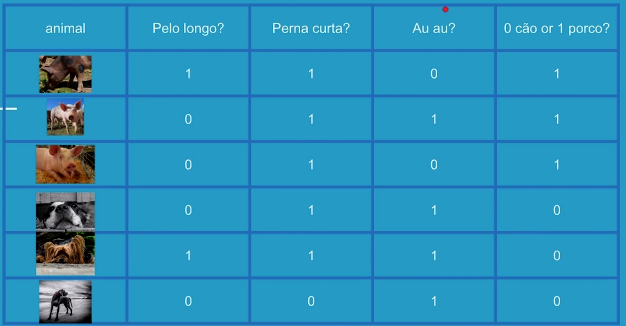

Para nosso problema estamos usando somente variáveis boolenas, mas como veremos no futuro, nada nos impede de usarmos variáveis quantitativas como features. No nosso problema definos como features:

- Boolean - Pelo Longo
  - Se for cachorro 1
  - Se for porco 0

- Boolean - Perna Curta
  - Se for cachorro 0
  - Se for porco 1

- Boolean - Late
  - Se for cachorro 1
  - Se for porco 0

Como você já deve suspeitar, as features são nossas variáveis independentes, ou seja, são nossos Xs.

A variável que queremos classificar neste caso será também do tipo booleano, 1 se for porco e 0 se for um cachorro.

 - 1 --> Porco
 - 0 --> Cachorro

 No nosso dataset, a variável que queremos prever é nossa variável Dependente Y.

#Montando Dataset

Como essa é apenas um introdução, nosso dataset vai ser montado manualmente e tera poucas linhas. Vamos seguir com a estrutura de features que definimos no tópico anterior:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# features (1 sim, 0 não)
# Pelo Longo?
# Perna Curta?
# Late?
porco1 = [0, 1, 0, 1]
porco2 = [0, 1, 1, 1]
porco3 = [1, 1, 0, 1]

cachorro1 = [0, 1, 1, 0]
cachorro2 = [1, 0, 1, 0]
cachorro3 = [1, 1, 1, 0]

dados_treino = np.array([porco1, porco2, porco3, cachorro1, cachorro2, cachorro3])
dados_treino = pd.DataFrame({"Pelo Longo": dados_treino[..., 0], "Perna Curta": dados_treino[..., 1],
                      "Late": dados_treino[..., 2], "Classificação": dados_treino[..., 3]})

dados_treino

,Pelo Longo,Perna Curta,Late,Classificação
0,0,1,0,1
1,0,1,1,1
2,1,1,0,1
3,0,1,1,0
4,1,0,1,0
5,1,1,1,0


O dataset apresentado acima contém as informações que vaoms dar para nosso modelo de regressão aprender. Veja que passamos junto com as features a classificação real, se é ou não um porco. Agora devemos instaciar um modelo "virgem" de regressão...

# Maquina de Vetores de Suporte - Linear SVM - Teoria

Este é o modelo mais simples de classificação supervisionado que podemos ter, ele é usado quando temos apenas 2 classes dentro da variável dependente Y, ou seja, quando temos uma label binária.

Umma explicação resumida, sem entrar em detalhes da equações matemáticas, para o que seria o algoritmo de Máquina de Veotres de Suporte, é que ele é um algoritimo que vai tentar traçar uma reta ou linha curva que vai separar esses 2 valores possíveis dentro de Y:

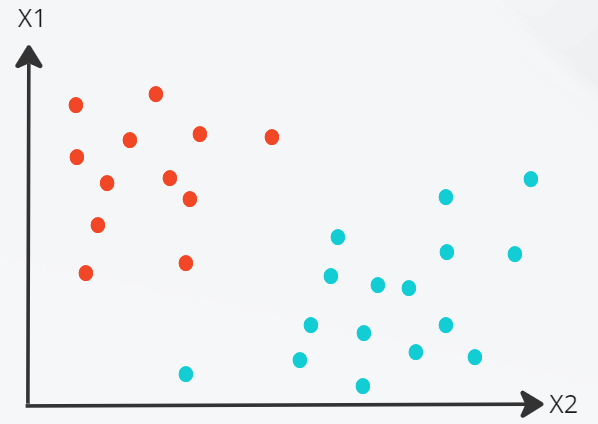

Nesta imagem temos dois grupos, esses grupos são as classes dentro da minha variável dependente Y. Veja que nos eixos temos as variáveis independentes X e são elas que vão das as caracteristicas/features para fazermos a classificação. A Maquina de Vetores de Suporte - SVM -  vai tenyar achar a melhor reta ou linha curva que separe de forma clara os dois grupos!

Benévolo, a melhor linha que separa esses grupos é aquela que vai ter a maior distância entre os grupos, veja:

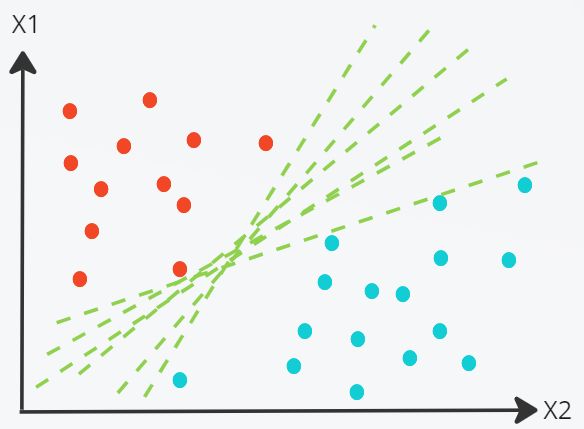

Cada uma dessas retas se chama de Hiperplanos, e como já tentam separar os grupos em regioões bem definidas.

Veja que existem infinitos Hiperplanos que separam os dois grupos... A grande sacada desses algoritmo é calcular aquele consiga estar com a maior distância entre ambos os grupos! Essa distancia entre ambos os grupos é chamado de Margem Do Hiperplano!

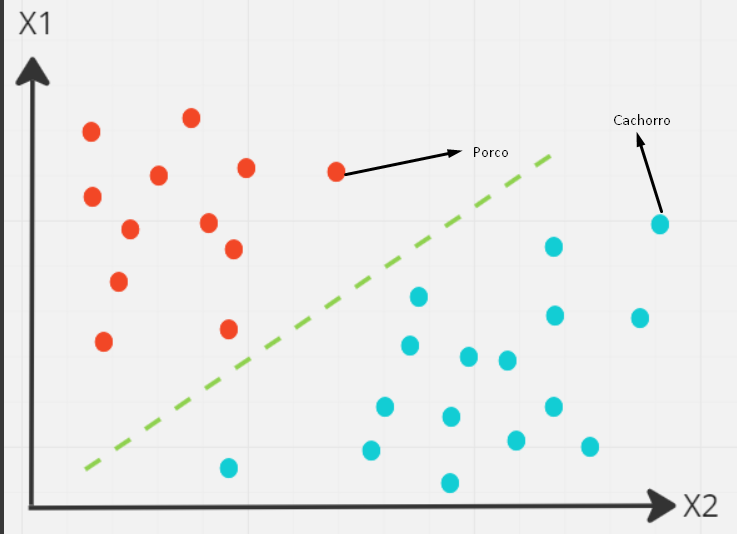

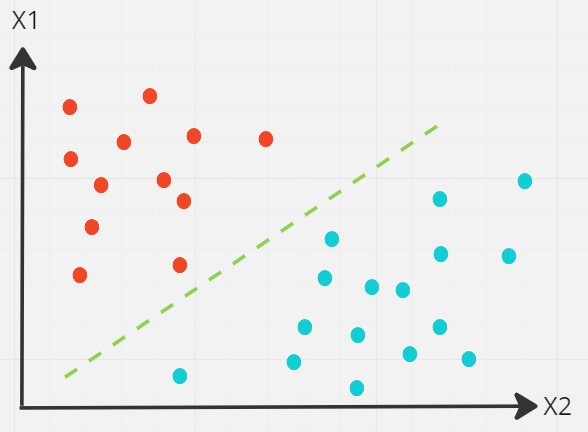

Para este exemplo o melhor Hiperplano é este que está na imagem, pois ele tem a maior Margem entre todos os Hiperplanos possíveis.

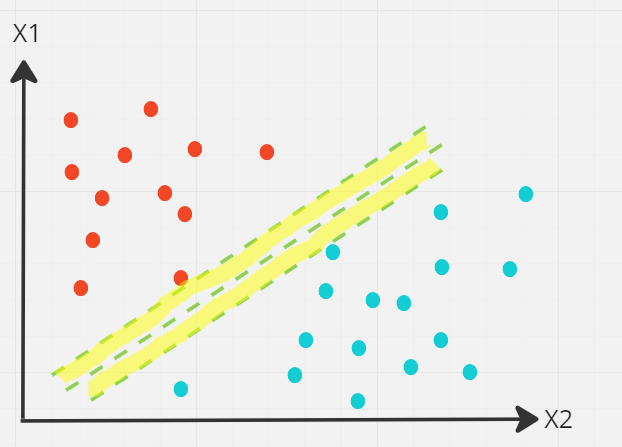

A margem deste Hiperplano é a regioão que está colorida.


Como comentado, nosso Hiperplano também pode ser uma curva, e também para este tipo de caso, existem inifinitos Hiperplanos de formato curvo de separam os dois grupos.

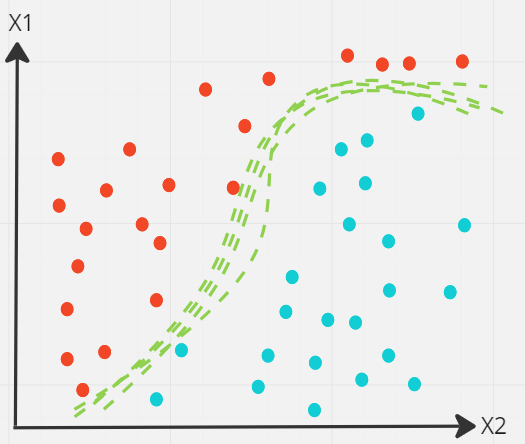

 Costuma-se dizer que para o caso curvo, a euqção de reta que definia o Hiperplano sufreu uma flexibilização para conseguir ajustar o Hiperplano ao ruídos. Ruídos são pontos perdidos de um grupo no meio dos outros que, não conseguiram ser separados com o Hiperplano:

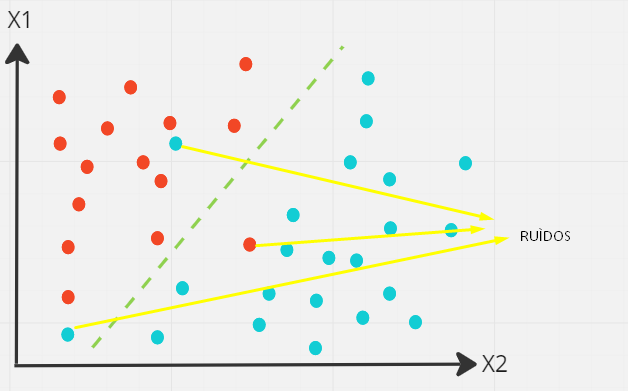


 A lógica segue a mesma, o algoritmo vai selecionar o Hiperplano que tenha a maior margem entre os dois grupos:


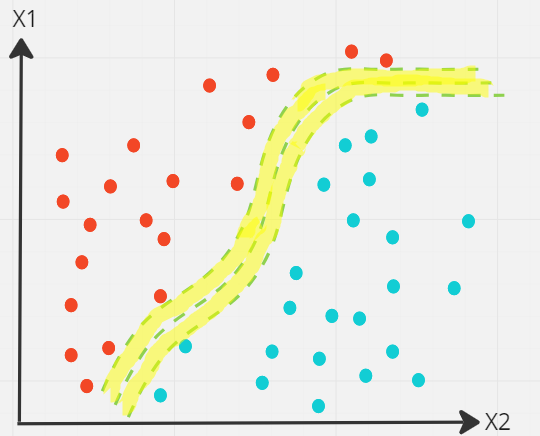

***RESUMO***

- A Máquina de Vetores de Suporte é um algoritmo de classificação.

- Ela Suporta bem outliers (erros)

- Ela consegue suportar variáveis dependetes Y com mais de 2 classes.

- Ela suporta variáveis independentes Xs tanto qualitativas quanto quantivativas

##Vetores de Suporte

Falando por cima da lógica matemática para o calculo dessa margem, que vai definir o melhor Hiperplano, ela é bastante simples. O cálculo da margem concentra sua atenção a pontos estratégicos, que são exatamente os pontos que estão na frenteira entre os dois grupos! Esses pontos são chamados de Vetores de Suporte (daí o nome do modelo, Maquina de Vetores de Suporte):

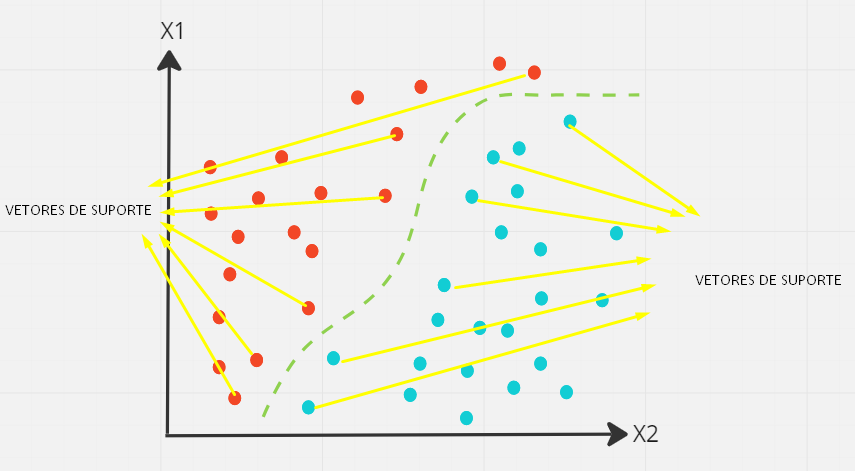

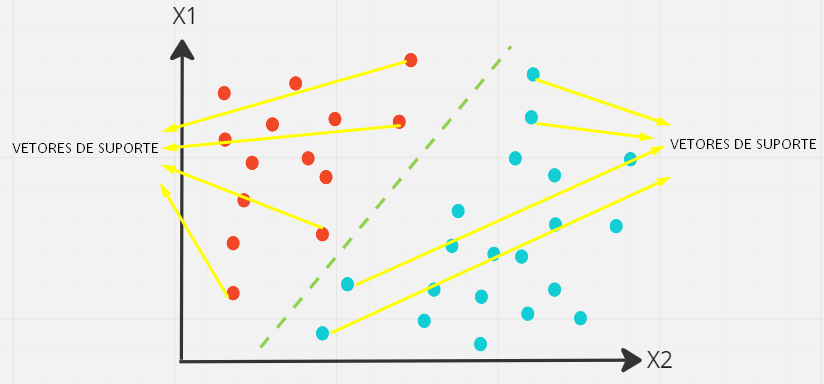

#Cenários de distribuição

O que vamos analisar são os diferentes cenários que a Máquina de Vetores De Suporte - SVM -  podem se deparar e, o mais importante, como o algoritimo SVM consegue lidar com esses cenários.

***Erros que não podem ser contornados por curvas***

---



É o caso onde existe claramente um erro dentro da distribuição de pontos, mas que, não é possível encaixar ele no grupo correto, pois isso acarretaria num erro maior, ou seja, na tentativa de inserir aqueles pontos no lado certo do Hiperplano, o Hiperplano acaba gerando mais erros. Veja o exemplo:

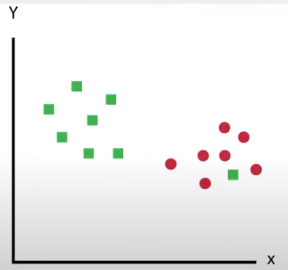

Veja que existe um erro, que é um ponto do grupo verde perdido no meio do grupo vermelho. Se tentássemos trasar uma cruva que pegásse ele, no final das contas estariamos criando mais erros, pois muitos pontos verdes ficariam do loado esquerdo do hiperplano.

  Nestes casos, o SVM simples mente ignora esse ponto perdido e trasa esse hiperplano:

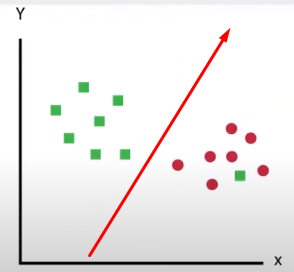

Portanto, podemos dizer que a SVM suporta certa quantidade de outliers.

***Grupos concentricos***


---



A Máquina de Vetores de Suporte também consegui lidar com casos onde temos grupos que se agrupam em aneis coocentricos, como o que está na aimagem abaixo:



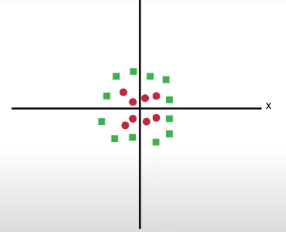

Para contornar esse problema, a máquina de vetores adiciona mais uma dimenção ao problema, ou sseja, ela vai transformar essa distribuição bidimensional em uma tridimencional, para isso ele adiciona mais um eixo Z a função incial, que é do tipo y = x. Essa nova dimenção, para conseguir separar bem os pontos, eleva X e Y ao quadrado, no final a função de Z será dada por:

Z = Y² + X²

Graficamente temos a nova situação:

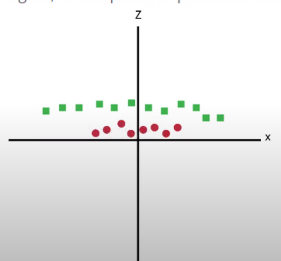

Com essa nova configuração, fica facíl da nossa máquina de vetores estimar um hiperplano que divida esses dois grupos.

Para termos uma noção espacial dessa transformação, vamos ver isso em 3d:

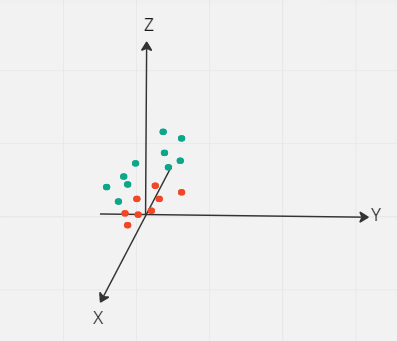



***Vários Hiperplanos - Várias Classes***


---
A máquina de vetores de suporte também suportam casos onde existem mais de uma classe dentro da variável independente Y que queremos prever. Para isso ele calcula varios hiperplanos, algums retos e outros curvos:


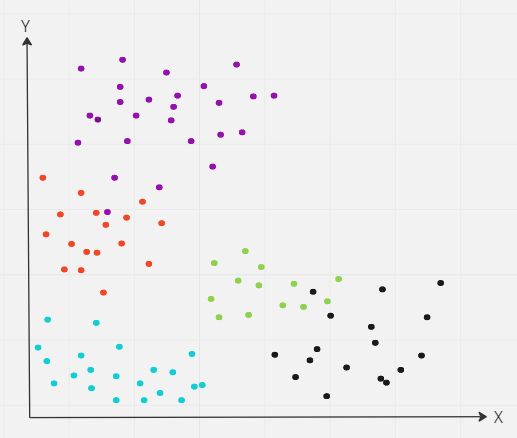

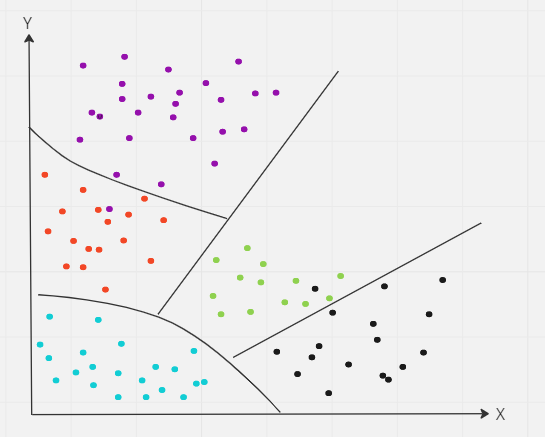

Ou seja, diferentes de outras tecnicas de classificação, como a regressão logística, a máquina de vetores de suporte lida bem com várias classes.

#Exemplo 1 - Máquina de Suporte de Vetores de Suporte -  Código

Agora que já sabemos nda teoria básica do algoritimo da Máquina de Suporte de Vetores - SVM, podemos nos concentrar na parte prática dele:

Benévolo, esse modelo de Máquina de Vetores de Suporte que estamos instânciado com a biblioteca sklearn.svm apenas faz Hiperplanos com linhas retas... O prõprio nome já mostra LinearSVC!

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
modelo = LinearSVC()
modelo.fit(dados_treino[["Pelo Longo", "Perna Curta", "Late"]], dados_treino["Classificação"])

LinearSVC()

In [ ]:
modelo.predict([[0, 1, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([0])

Vamos fazer dados de teste, ou seja, vamos criar linhas onde já sabemos se vai ser um cachorro ou num porco e vamos comparar com o que nossa máquina de vetores de suporte nos devolve:

In [ ]:
# features (1 sim, 0 não)
# Pelo Longo?
# Perna Curta?
# Late?

dados_teste = [[1,1,0,1], [0,0,0,1], [0,0,1,0], [0,1,1,0], [1,0,1,0], [0,1,0,1], [1,1,1,0] ]
dados_teste = pd.DataFrame(dados_teste)

y_teste = dados_teste.iloc[:, 3:4]
x_teste = dados_teste.iloc[:, 0:3]

x_teste

,0,1,2
0,1,1,0
1,0,0,0
2,0,0,1
3,0,1,1
4,1,0,1
5,0,1,0
6,1,1,1


In [ ]:
y_teste

,3
0,1
1,1
2,0
3,0
4,0
5,1
6,0


In [ ]:
previsoes = modelo.predict(x_teste.values)
previsoes

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([1, 1, 0, 0, 0, 1, 0])

Vamos utilizar a matriz de confusão da biblioteca sklearn para ver quantos erros e acertos nosso modelo conseguiu fazer.

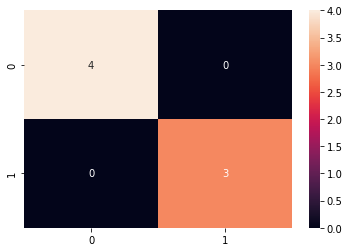

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_teste, previsoes), annot=True, fmt="d")

O nosso modelo acertou 100% dos testes, logo ele foi muito bem ajustado e podemos dizer que ele tem um precisão de 100%.

In [ ]:
modelo.score(x_teste, y_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


1.0

A função score do skelarn mostra que tivemos um acerto de 100%

#Exemplo 2 - Máquina de Vetores de Suporte

Vamos trabalhar agora com dados Qualitativos, o nosso dataset é o histórico de acessos dos usuários a uma página na web, onde o campo Home significa se o usuário acesso a page home (1), o campo How it Works mostra se o usuário acesso a página "how it works" (1) e os campos Contact e Bougth são campos que mostram se o usuário entrou em contato (1) e comprou o produto (1) respectivamente.

In [ ]:
link = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(link, sep = ",")
dados

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
94,0,0,1,0
95,1,1,1,1
96,0,0,1,0
97,0,1,0,0


Vamos traduzir nossos dados:

In [ ]:
dados.rename(columns= {"home": "Página_Inicial", "how_it_works":"Como_Funciona", "contact":"Contato", "bought":"Comprado"}, inplace = True)
dados

,Página_Inicial,Como_Funciona,Contato,Comprado
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
94,0,0,1,0
95,1,1,1,1
96,0,0,1,0
97,0,1,0,0


Nosso objetivo aqui é tentar prever se um usuário vai realizar a compra analisando as variáveis home, how_it_works e contact. Vamos separar as variáveis independentes/features Xs e a variável dependente Y:

In [ ]:
x = dados[["Página_Inicial", "Como_Funciona", "Contato"]]
y = dados["Comprado"]

Vamos fazer algo que não fizemos no exemplo anterior, que é a separação do nosso dataset em um conjunto para treino e outro para teste. Para isso vamos usar o sklearn. Vamos adicionar dois parametros na função train_test_split(), que é random_state, que vai garantir que, sempre que rodarmos a função train_teste_split() ele vai selecionar as mesma linhas para treino e teste. O código do random_state é chamado no meio de machine learning de SEED = Semente.

E a grande novidade que vamos aprender é o segundo parâmetro, o parâmetro straify = y! Esse parâmetro garante que a separação dos dados em treino e teste serão feitos na mesma proporção para todas as classes dentro da variável Qualitativa Y. Por exemplo, se na minha variável qualitativa Y tiver 1 classes 0 e 1 (Y é booleana), o parâmetro straify = y, garante que a proproção de 0 e 1 para os dados de teste e treino serão os mesmos.

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 20 #Eu escolhi um número aleatório
x_treino, x_teste, y_treino, y_teste = train_test_split(x.values, y.values, test_size = 0.25, random_state = SEED, stratify = y.values)

Aqui separamos 30% para teste e 70% para treino do nosso modelo de Máquina de vetores de suporte

In [ ]:
from sklearn.svm import LinearSVC

modelo_compra = LinearSVC()
modelo_compra.fit(x_treino, y_treino)

LinearSVC()

In [ ]:
previsoes_compras = modelo_compra.predict(x_teste)
previsoes_compras

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1])

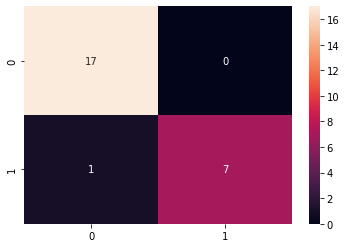

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_teste, previsoes_compras), annot=True, fmt="d")

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, previsoes_compras)

0.96

#Exemplo 3

A nossa base de dados é sobre projetos de sites que estão em construção. Nessa base existem 3 campos:

- Expected_hours -->  É a quantidade de tempo em horas estimadas de trabalho para finalizar o site. Campo do tipo quantitativo.

- Price --> O preco que o dono do site está disposta a pagar para que algum programador faça o site. O campo é quantitavito.

- Unfinished --> Campo que mostra se o site foi finalizado (0) ou não (1).

Veja que, podemos supeitar que existe uma relação entre o campo Unfinished com os outros dois campos, pois o programados irá fazer uma ponderação entre as horas de trabalho que o site levará e o proço que o dono do site está disposto a pagar. Nosso objeitvo aqui é tentar prever a situação do site ( se já foi finalizado ou não) somente analizando os campos expected_hours e price.

In [ ]:
link = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados_sites = pd.read_csv(link, sep = ",")
dados_sites

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


traduzindo o dataset

In [ ]:
dados_sites.rename(columns = {"unfinished":"Finalizado", "expected_hours":"Espectativa_Horas", "price":"Preco" }, inplace = True)
dados_sites

,Finalizado,Espectativa_Horas,Preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


Vamos fazer uma troca de valores na coluna Finalizado, veja que, como ela está não faz muito sentido pois se o site não está finalizado ele vai aparecer como 1... Vamos realizar essa troca de valores, onde está 1 coloca 0 e onde está 0 coloca 1

In [ ]:
dados_sites["Finalizado"] = dados_sites.Finalizado.map({1:0, 0:1})
dados_sites

,Finalizado,Espectativa_Horas,Preco
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170
...,...,...,...
2152,1,80,7518
2153,0,52,1332
2154,1,40,473
2155,1,75,5324


##Análise exploratória dos dados

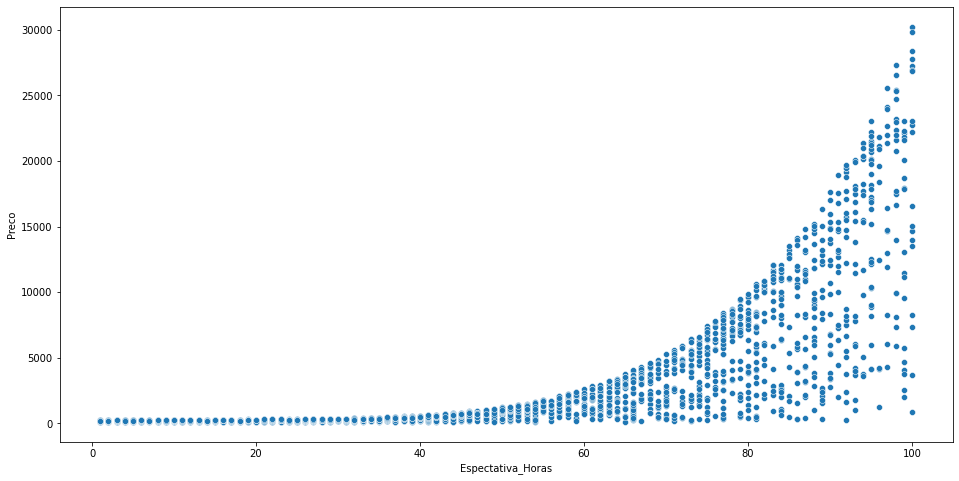

In [ ]:
import seaborn as sns
grafico = sns.scatterplot(data = dados_sites, x = "Espectativa_Horas", y = "Preco")
grafico.figure.set_size_inches(16,8)

Aqui conseguimos ver que, conforme as espectativas de horas que o projeto leva, de fato o valor que o cliente está disposto a pagar vai amumentando. Podemos dizer que esse aumento é de forma polinomial.

Vamos distinguir quais são os sites finalizados (aceitos pelos programadores) e os não finalizados:

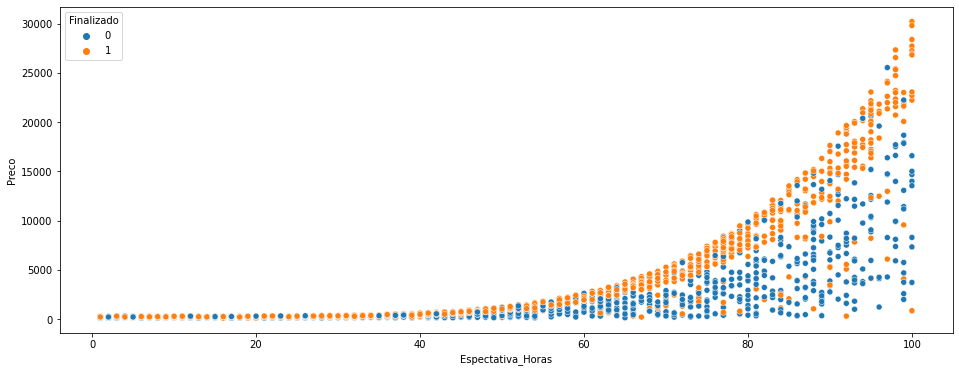

In [ ]:
grafico = sns.scatterplot(data = dados_sites, x = "Espectativa_Horas", y = "Preco", hue = "Finalizado")
grafico.figure.set_size_inches(16,6)

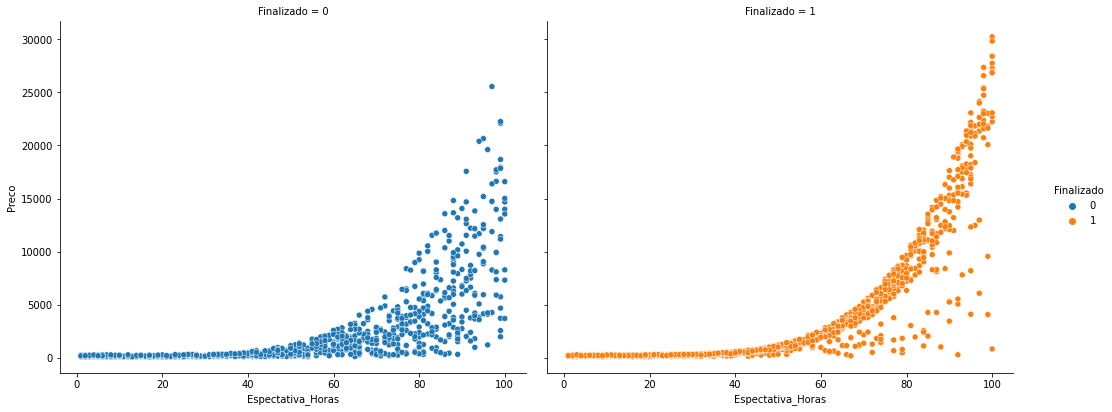

In [ ]:
grafico = sns.relplot(data = dados_sites, x = "Espectativa_Horas", y = "Preco", col = "Finalizado", hue="Finalizado")
grafico.figure.set_size_inches(16,6)

Podemos ver que, os projetos finalizados se concentram na frontera da curva do gráfico, que é justamente onde se concentram os melhores pagamentos em relação aos valores pagos.

Vamos usar a Máquina de Vetores de Suporte para fazer a classificação desses dados. Mas veja benévolo, será que é possível traçar uma reta (no caso do LinearSVC) que separem bem os dois dados? Olhando para o primeiro gráfico de distribuição, existem muitos erros, muitos pontos laranjas no meio dos azuis e muitos pontos azuis no meio dos laranjas...

##Treinando modelo e avaliando ele - Baseline

In [ ]:
from sklearn.model_selection import train_test_split

x = dados_sites[["Espectativa_Horas", "Preco"]]
y = dados_sites["Finalizado"]

SEED = 150 #Eu escolhi um número aleatório
np.random.seed(SEED)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify = y.values)

Separando nossos dados em 75% para treino e 25% para teste.

Veja que passamos o Seed que fixa nosso estado randomico de separação de dados de teste e treino e passamos ele dentro do parâmetro da função Seed() do numpy... Podemos fazer isso porque o sklearn, se não for passado nenhum estado randomico fixo para ele, ele uso o que estiver dentro do numpy.random.seed(). Ele vai no kernel e ve se para esta exucação python já passamos algum parametro dentro da função .seed()

Treinando nosso modelo...

In [ ]:

modelo_sites = LinearSVC()
modelo_sites.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

Analisando a acurácia do modelo:

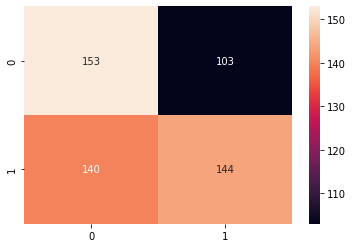

In [ ]:
from sklearn.metrics import confusion_matrix
#sns.heatmap(confusion_matrix(y_teste, previsoes_compras), annot=True, fmt="d")
previsoes_sites = modelo_sites.predict(x_teste)
sns.heatmap(confusion_matrix(y_teste, previsoes_sites), annot = True, fmt="d"  )

In [ ]:
from sklearn.metrics import accuracy_score
print("Acurácia Modelo Sites : %.2f%%" % accuracy_score(y_teste, previsoes_sites))

Acurácia Modelo Sites : 0.55%


Benévolo, como já suspeitavamos, parece que nosso modelo de Máquina de Vetores de Suporte não teve uma boa performece... Ele acertou 55%, isso é pior que um chute (o chute ou vc acerta ou você erra, ou seja, 50% para cada hipótese). Para todo modelo de classificação, uma acurácia maior que 50% é o mínimo! Pois próximo de 50% é o que conseguimos com o chute!

Benévolo, esse caso de chute, que é o míniumo aceitável é chamado de caso de base ou Baseline!

#Analisando o que deu errado

Temos que entender o que deu de errado nesse nosso modelo de máquina de voetores de decisão... Primeiramente devemos fazer o que todo Ciêntista de dados faz quando quer "Debugar" problemas com o modelo de Maquina de vetores de suporte....

- 1º - Verificar se a amostra para treino não é tendenciosa.
  - Isto é, vamos analisar a amostra que o método train_test_plit não é tendenciosa para algum dos grupos 0 ou 1 que queremos classificar, isto é de novo, vamo varificar se a amostra de treino é representativa com a população de que venho:

Text(0.5, 1.0, 'Dados Treino')

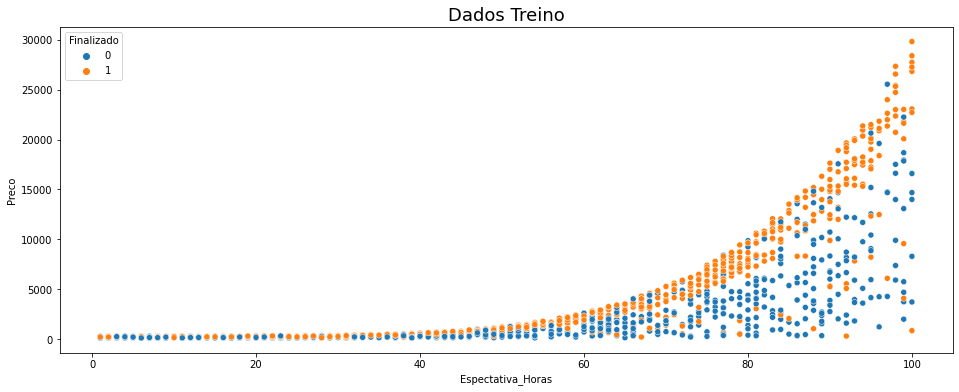

In [ ]:
grafico = sns.scatterplot( x = x_treino.Espectativa_Horas , y = x_treino.Preco , hue = y_treino)
grafico.figure.set_size_inches(16,6)
grafico.set_title("Dados Treino", fontsize = 18)

Benévolo, veja o os dados de teste representam bem a população de que vieram, então podemos descartar essa hipótese... Vamos para o passo 2:

- 2º - Vamos visualizar a reta de Hiperplano traçada pela classe LinearSVC()

Como foi suspeitado anteriormente... É díficil trabalhar com um hiperplano reto que consiga dividir os dados em dois planos diferentes para o nosso caso, veja o gráfico de disperção:

Text(0.5, 1.0, 'Dados Reais')

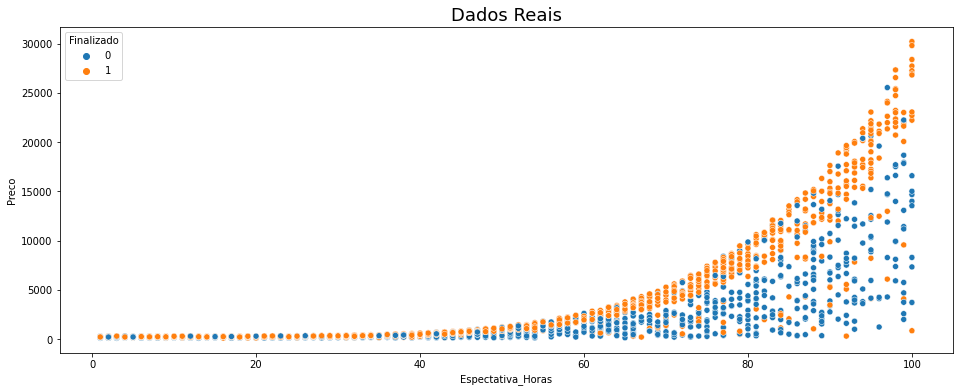

In [ ]:
grafico = sns.scatterplot(data = dados_sites, x = "Espectativa_Horas", y = "Preco", hue = "Finalizado")
grafico.figure.set_size_inches(16,6)
grafico.set_title("Dados Reais", fontsize = 18)

Para isso devemos fazer com que nosso modelo treinado (aquele que queremos avaliar o que deu de errado) receba várias entradas de teste X (Espectativas de horas e Precos) de tal forma que possamos visualizar essa hiperplano. A grande sacada é saber que a quantidade de valores de teste X deve ser grande, de tal forma que todos os pontos previstos preencham todos os pixels da tela do nosso monitor!

Para isso devemos setar preimeiro o range que queremos para as variáveis explicativas/inpedentes Xs, Preco e Espectativa_Horas:

In [ ]:
x_min = x_teste.Espectativa_Horas.min()
x_max = x_teste.Espectativa_Horas.max()

y_min = x_teste.Preco.min()
y_max = x_teste.Preco.max()

print(x_min, x_max, y_min, y_max)

1 100 100 30223


Agora devemos definir quantos pontos queremos criar dentro de cada range, o range da variável explicativa Espectativas_hiras e o range da variável explicativa Preco... Benévolo, veja que, somente é possível fazer um ponto no grafico (veja os graficos anteriores) se temos o par ordenado Preco X Espectativa_Horas, logo o número de elementos de ambos os range deve ser o mesmo:

In [ ]:
range_tamanho = 100

O que definimos aqui agora é a quantidade de elementos que vai ter em cada range. Fazendo as contas de quantos pares ordenados podemos fazer, teremos 100x100 = 10.000 pares ordenados que podemores plotar no gráfico! Com essas 10 mil pontos vamos pedir para que nosso modelo treinado faça a classificação e partir disso, poderemos visualizar a reta de hiperplano que ele modelou!

In [ ]:
#np.arange(minimo, maximo, distancia entre cada valor)
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/range_tamanho)

eixo_y = np.arange(y_min, y_max, (y_max - y_min)/range_tamanho)
eixo_y

array([  100.  ,   401.23,   702.46,  1003.69,  1304.92,  1606.15,
        1907.38,  2208.61,  2509.84,  2811.07,  3112.3 ,  3413.53,
        3714.76,  4015.99,  4317.22,  4618.45,  4919.68,  5220.91,
        5522.14,  5823.37,  6124.6 ,  6425.83,  6727.06,  7028.29,
        7329.52,  7630.75,  7931.98,  8233.21,  8534.44,  8835.67,
        9136.9 ,  9438.13,  9739.36, 10040.59, 10341.82, 10643.05,
       10944.28, 11245.51, 11546.74, 11847.97, 12149.2 , 12450.43,
       12751.66, 13052.89, 13354.12, 13655.35, 13956.58, 14257.81,
       14559.04, 14860.27, 15161.5 , 15462.73, 15763.96, 16065.19,
       16366.42, 16667.65, 16968.88, 17270.11, 17571.34, 17872.57,
       18173.8 , 18475.03, 18776.26, 19077.49, 19378.72, 19679.95,
       19981.18, 20282.41, 20583.64, 20884.87, 21186.1 , 21487.33,
       21788.56, 22089.79, 22391.02, 22692.25, 22993.48, 23294.71,
       23595.94, 23897.17, 24198.4 , 24499.63, 24800.86, 25102.09,
       25403.32, 25704.55, 26005.78, 26307.01, 26608.24, 26909

Agora temos dois ranges cada um com 100 elementos... Se jogarmos esses valores das variáveis independentes X agora para o nosso modelo ele vai nos devolver 100 previsões! Não queremos isso, queremos 10.000 previões, logo ainda falta fazermos a combinação desses elementos 100x100!

A combinação sera feita da seguinte forma, para cada um dos 100 valores do eixo X - Espectativa_horas - ele vai parear com todos os 100 valores do eixo Y - Preco - , Logo ao final teremos 10.000 pontos plotados, ou seja, 10.000 entrada para o nosso modelo classificar:

para isso camos usar o método meshgrid(x, y) onde ele já vai repetir 100 vezes o mesmo valores dentro de cada range. Note que vamos precisar de 100 vezes o valor repetido dentro de cada range!

In [ ]:
xx, yy =  np.meshgrid(eixo_x, eixo_y)
yy

array([[  100.  ,   100.  ,   100.  , ...,   100.  ,   100.  ,   100.  ],
       [  401.23,   401.23,   401.23, ...,   401.23,   401.23,   401.23],
       [  702.46,   702.46,   702.46, ...,   702.46,   702.46,   702.46],
       ...,
       [29319.31, 29319.31, 29319.31, ..., 29319.31, 29319.31, 29319.31],
       [29620.54, 29620.54, 29620.54, ..., 29620.54, 29620.54, 29620.54],
       [29921.77, 29921.77, 29921.77, ..., 29921.77, 29921.77, 29921.77]])

In [ ]:
yy.shape

(100, 100)

Temos 100 colunas, com 100 linhas, onde cada linha repete o mesmo valor!

In [ ]:
yy.ravel()

array([  100.  ,   100.  ,   100.  , ..., 29921.77, 29921.77, 29921.77])

In [ ]:
len(yy.ravel())

10000

o que acabamos de fazer com o método .ravel() é colocar todos esses 10.000 valores em uma única linha, vamos precisar disso para concatenar os valores 2 a 2 e assim formar os pontos coordenado

In [ ]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [ ]:
pontos.shape

(10000, 2)

Com os 10.000 pontos em mão, podemos gerar as classificações para cada um deles com o nosso modelo:

In [ ]:
previsoes_10k = modelo_sites.predict(pontos)
previsoes_10k

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
previsoes_10k.shape

(10000,)

Perceba que ele colocou as previsões em um única linha! Para o método que vamos usar, o countourf() do plt, previsamos que as 10k previsoes tenham o mesmo formato que as variáveis xx e yy, ou seja, temos que formatar as 10k previões numa matriz 100x100:

In [ ]:
previsoes_10k = previsoes_10k.reshape(xx.shape)
previsoes_10k

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

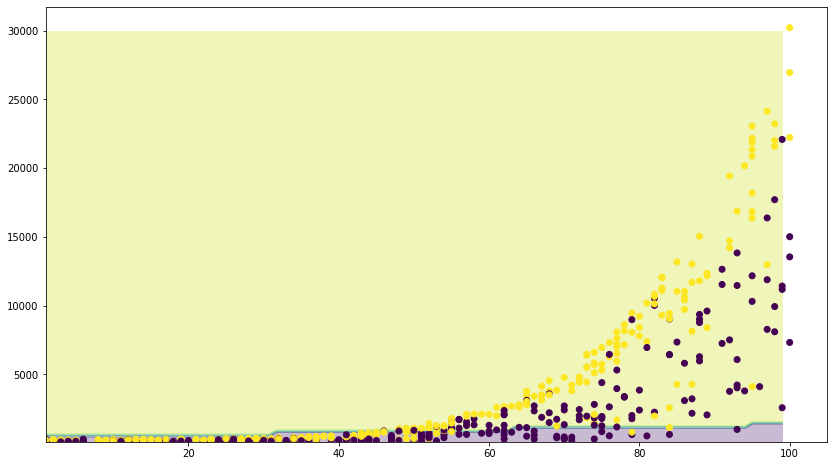

In [ ]:
import matplotlib.pyplot as plt


plt.contourf(xx, yy, previsoes_10k, alpha = 0.3)
grafico = plt.scatter( x = x_teste.Espectativa_Horas , y = x_teste.Preco , c = y_teste)
grafico.figure.set_size_inches(14,8)

Veja benévolo, todo que esta acima do Hiperplano (campo em amarelo claro) o modelo de máquina de vetores de suporte clasifica como sendo da classe Finalizado = 1, e tudo que está abaixo dete hiperplano (campo em roxo claro) o nosso modelo classificou como sendo Finalizado = 0.

Podemos conluir que um estimador/Hiperplano reto, não é o ideal prar este tipo de distribuição, logo para estes tipos de casos, vamos utilizar estimadores não lineares....

#Estimadores/Hiperplanos Não Lineares

Na mesma biblioteca do sklearn.svm existem várias classes de Máquinas de Vetores de Suporte - SVM - , você consegue ver quais tipos de Máquinas de Vetores de Suporte existem na documentação do skelearn.svm:   


https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

O que nos interessa aqui é a classe SVC que é a classe de Máquina de Vetores de Suporte (SVM) que suporta hiperplanos não lineares!

Para agilizar  nosso código, vamos intanciar a classe SVC e já vamos separar os dados de teste e treino,  treinar o modelo e fazer a previsão:

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED  = 150
np.random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify= y)

modelo_sites_SVC = SVC(gamma = "auto")#Precisamos passar este parametro, caso contrário nossa classe SVC vai tracar retas, igual a classe LinearSVC
modelo_sites_SVC.fit(x_treino, y_treino)

previsoes_sites_SVC = modelo_sites_SVC.predict(x_teste)

print("A acuracia do modelo SVC : %.2f%%" % accuracy_score(y_teste, previsoes_sites_SVC))

A acuracia do modelo SVC : 0.60%


Estranho.. estamos com uma acurária do modelo de SVM que usava hiperplanos lineares... vamos visualizar o hiperplano feito pela classe SVC.

De novo, vamo colocar todos os códigos que precisamos para plotar a linha de decisão em uma única célula:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


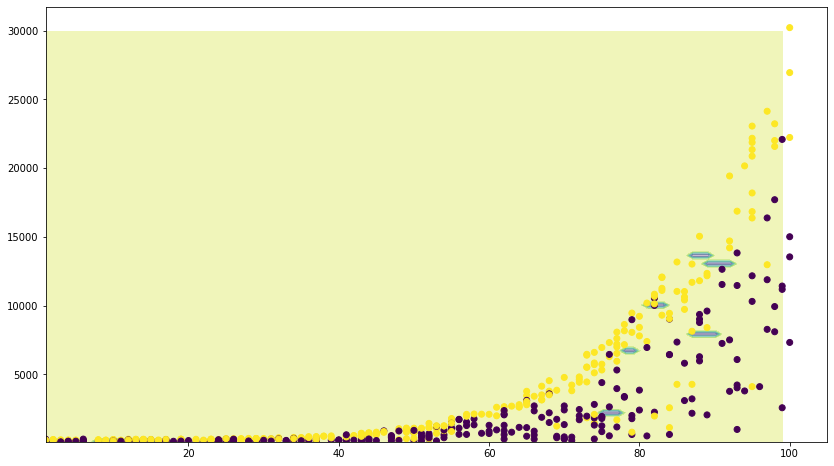

In [ ]:
import matplotlib.pyplot as plt

x_min = x_teste.Espectativa_Horas.min()
x_max = x_teste.Espectativa_Horas.max()

y_min = x_teste.Preco.min()
y_max = x_teste.Preco.max()

range_tamanho = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/range_tamanho)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/range_tamanho)

xx, yy =  np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

previsoes_10k = modelo_sites_SVC.predict(pontos)

previsoes_10k = previsoes_10k.reshape(xx.shape)

plt.contourf(xx, yy, previsoes_10k, alpha = 0.3)
grafico = plt.scatter( x = x_teste.Espectativa_Horas , y = x_teste.Preco , c = y_teste)
grafico.figure.set_size_inches(14,8)

Benévolo que interessante note as seguintes coisas:

- A classe SVC fez vários hiperplanos circulares!
  
  
- A área interior de cada circulo é o campo onde o modelo de SVM vai classificar como sendo 0 para Finalizado.

Mas o nosso objetivo principal ainda não foi comprido... A Máquina de Vetores não desenhou um hiperplano curvo, que demilite a fronteira entre os dois grupos.

O que aconteceu aqui benévolo, foi um mal funcionamento da Máquina de Vetores de Suporte por conta a diferença de escalas entre as variáveis explicativas! Isto é um pré requisito!

##Prerequisitos - SVM Não Lineares

Vamos Listar os pré requsitos:

- O valor que se quer prever deve ser do tipo Qualitativo

- As escalas das variáveis explicativas/features/independentes devem ser as mesmas.
  - Ou seja, devemos padronizar nossas features em uma faixa igual para todos. este processo se chama de padronização.

#Padronização - Teoria

Benévolo, permitame uma breve digressão do assunto principal desse curso de Máquina de Vetores De Suporte para explicar o que seria o processo de Padronização de dados. Acho necessário essa digressão pois o processo de padronização de dados é muito utilizado em vários modelo de machine learning que, quando se depara com features de diferentes escalas ela dá mais prioridade a aquela que tem escala maior!

Por exmeplo, neste exemplo estamos lidando com features onde a que tem a maior escala é a feature Preco, ela vai de 100 até 30k... Para o modelo de SVM ela entende que a variável Preco por ter uma escala maior, é aquela que também vai ter aior poder explicativo! o QUE NÃO É VERDADE!

A tecnica de Padronização procura deixar todos os valores (distribuição de valores) da feature tendo média próxima de 0 e desvio padrão com valor máximo á 1. Benévolo.... Sabe que distribuição tem média = 0 e devio padrão abaixo de 1?... SIM A DISTRIBUIÇÂO NORMAL N(média=0, desvioPadrao<1)!

Ou seja, o método de padronização não somente coloca todos os valores dentro das features num mesmo intervalo! Mas também aproxima elas a uma distribuição normal!

Matemáticamente falando fazemos essa padronização dos valores dentro de uma feature, pegando cada valor dentro dela e subtraindo dela a média dentro da feature (média populacional) e dividindo pelo desvio padrão da feature (desvio padrão da população).


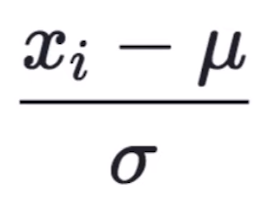

Onde Xi é cada valor dentro da feature que se quer padronizar.

Benévolo... Você já conhece essa conta... è a conta de padronização Z de uma distribuição não normal para a normal! Para que possamos usar a tabela de probabilidade Z!

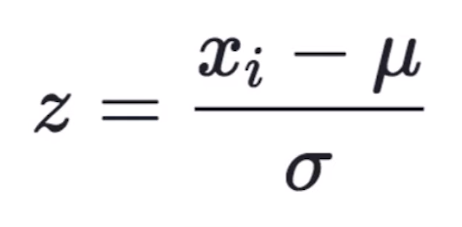

Ou seja, quando tinhamos uma uma distribuição não normal e queriamos usar a tabela Z de probailidades (ela foi calculada com uma distribuição normal), o que fazimos era tentar aproximar os valores dessa distribuição não normal a uma de distribuição normal (media = 0 e desvio padrão < 1)

Vejamos um exemplo de padronização:

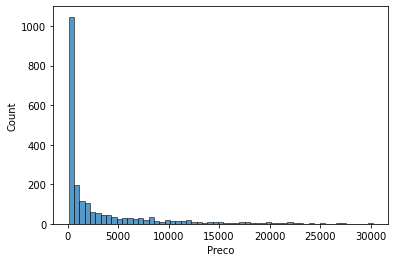

In [ ]:
sns.histplot(dados_sites.Preco)

In [ ]:
print("Media de preco: ",dados_sites.Preco.mean())
print("Desvio Padrao de Preco : ", dados_sites.Preco.std())

Media de preco:  3140.6968011126564
Desvio Padrao de Preco :  5079.220195638589


Aplicando a padronização na raça:

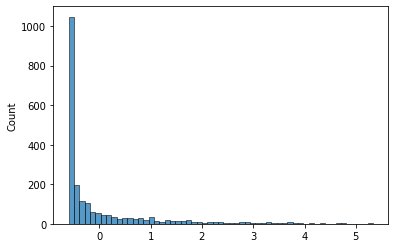

In [ ]:
Preco_padronizado = []
media = dados_sites.Preco.mean()
desvioPadrao = dados_sites.Preco.std()

for i in dados_sites.Preco:
  Preco_padronizado.append((i - media)/desvioPadrao)

sns.histplot(Preco_padronizado)

In [ ]:
print("Media de preco: ", np.mean(Preco_padronizado))
print("Desvio Padrao de Preco : ", np.std(Preco_padronizado))

Media de preco:  0.0
Desvio Padrao de Preco :  0.9997681696966644


In [ ]:
print("Max e min: ", np.min(Preco_padronizado), np.max(Preco_padronizado))

Max e min:  -0.5986542587233438 5.331980531606467


Veja que de fato, nossa média agora é 0 e nosso desvio padrão é menor que 1... E note também que nossa escava para a feature Preco, que antes ia de 100 até 30k, agora esta na escala das unidades, vai de -0,6 até 5,3!

#Padronização - Pratica

Para padronizar as variáveis independentes/features vamos utilizar uma classe do prórpio sklearn, a classe StandarScaler, como o nome já sugere, ele vai padronizar as escalas das variáveis explicativas que vamos usar para treinar o modelo.

Benévolo, note que, esse é um tipo de processamento pré treinamento! Ou seja, ele é um pré processamento dos dados, dái que vem o nome da biblioteca dentro do sklearn que vamos importar a classe StandardScaler(). Note no código abaixo que renomeamos os dados x_treino e x_teste para x_raw_treino e x_raw_teste respectivamente... Se você sabe inglês, sabe que raw = cru, e é uma boa prática de progamação chamarmos os dados ainda não padronizados de dados crus, ou seja, dados raw.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

SEED  = 150
np.random.seed(SEED)
x_raw_treino, x_raw_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify= y)

#Padronizando as features

escala = StandardScaler()
escala.fit(x_raw_treino)#Padronizando os dados para que sigam a mesma escala da feature x_raw_treino
x_treino = escala.transform(x_raw_treino)
x_teste = escala.transform(x_raw_teste)

In [ ]:
print(x_treino[:,1].max(), x_treino[:,1].min())

5.233021271228499 -0.5963443921802076


In [ ]:
print(x_raw_treino.Preco.max(), x_raw_treino.Preco.min())

29820 100


Benévolo veja a diferençca entre as escalas, as variáveis explicativas não padronizadas, no exmplo a variável Preco ia de 100 até 30k, agora com a padronização ela vai de -0.5 até 5... grande diferença. Note que que a nova escala com a padronização feita a mão que fizemos no tópico anterior!

Vamos instanciar o modelo de SVM não linear de novo, mas agora vamos treinar ele com os dados padronizados. De novo, vou colocar todo o código de treino e previsão em uma única célula:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo_sites_SVC_padronizado = SVC(gamma = "auto")
modelo_sites_SVC_padronizado.fit(x_treino, y_treino)
previsoes_sites_SVC_padronizado = modelo_sites_SVC_padronizado.predict(x_teste)

acuracia = accuracy_score(previsoes_sites_SVC_padronizado, y_teste)*100
print("Acuracia do modelo : %.2f%%" % acuracia)

Acuracia do modelo : 70.37%


Benévolo nossa acurácia aumentou para 70%, o que é bem acima do caso base, isto é, bem acima do chute!

Agora vamos vizualizar o hiperplano que nosso modelo de vetores de suporte não linear modelo para os dados padronizados!

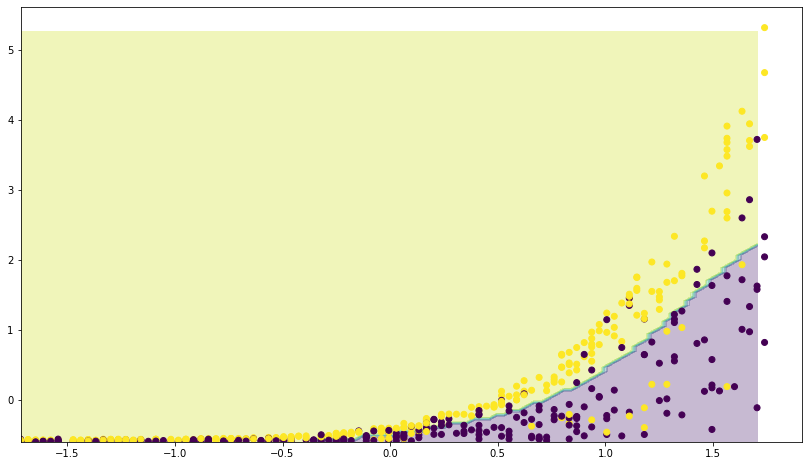

In [ ]:
import matplotlib.pyplot as plt

x_min = x_teste[:,0].min()
x_max = x_teste[:,0].max()

y_min = x_teste[:,1].min()
y_max = x_teste[:,1].max()

range_tamanho = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/range_tamanho)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/range_tamanho)

xx, yy =  np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

previsoes_10k = modelo_sites_SVC_padronizado.predict(pontos)

previsoes_10k = previsoes_10k.reshape(xx.shape)

plt.contourf(xx, yy, previsoes_10k, alpha = 0.3)
grafico = plt.scatter( x = x_teste[:,0] , y = x_teste[:,1] , c = y_teste)
grafico.figure.set_size_inches(14,8)

Benévolo, que lindo!, veja que agora nosso método de vetores de suporte está fazendo exatamente o que esperávamos que ele fizésse! Agora ele desenhou um hiperplano curvo, o melhor possível, veja também que resolvemos o

#Máquina De Vetores De Suporte - Exemplo 4


Neste quarto exemplo, vamos lidar com uma base de dados 3 variáveis explicativas (até agora somente lidamos com 2), onde as 3 são variáveis quantitativas!

##Descrição da Base De Dados

Nossa base de dados de 10k linhas, e é sobre a venda de carros, nela temos 3 variáveis independentes/features:

- Price/preco
  - É o valor em dólares do valor do carro.

- Modelo Year/ Ano do Modelo
 - Como o nome já explica, é o ano do lançamento do modelo de carro.

- Mileage Per Year/ Milhas por ano
  - Como o nome já sugere, é a quantidade de milhas que essa carro andou em média por ano.

Dentro da nossa base de dados temos uma variável qualitativa/dependente, que é a variável Sold:

- Sold/Vendido
  - Variável Qaulitativa binária, que mostra se o modelo de carro foi vendido ou não.

In [ ]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri, sep = ",")
dados

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


##Tratando os dados

vamos traduzir nossa base de dados e excluir a coluna indice que veio a mais:

In [ ]:
dados.pop("Unnamed: 0")
dados.rename(columns = {"mileage_per_year":"Milhas_Por_Ano", "model_year":"Ano_Do_Modelo",
                        "price":"Preco", "sold":"Vendido"}, inplace = True)
dados.Vendido = dados.Vendido.map({"yes":1, "no":0}, )
dados

,Milhas_Por_Ano,Ano_Do_Modelo,Preco,Vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1
...,...,...,...,...
9995,15572,2006,97112.86,0
9996,13246,2002,107424.63,1
9997,13018,2014,93856.99,0
9998,10464,2011,51250.57,1


Veja a transformação que fizemos na coluna Vendido, veja que nela não traduzimos, nela transformamos os campos Strings em bináirios! Isso porque a maioria dos modelo de classificação de variáveis binárias, exigie que essa variável binária seja na forma booleana!

Adora vamos realizar transformações da unidade de medida, vamos transformar milhas para kilómetos e vamos alterar o campo Ano De Modelo para Idade Do Modelo, Para isso vamos subtrair o ano atual pelo ano do modelo:

In [ ]:
#Trannsformação milha para quiilometro
# 1 milha  = 1.609 quilometros

dados["Milhas_Por_Ano"] = dados.Milhas_Por_Ano * 1.609
dados.rename(columns = {"Milhas_Por_Ano":"Quilometros_Por_Ano"}, inplace = True)

#Tranformação de Ano de Modelo para Idade
from datetime import datetime
ano_atual = datetime.today().year

dados.Ano_Do_Modelo = ano_atual - dados.Ano_Do_Modelo
dados.rename(columns = {"Ano_Do_Modelo":"Idade"}, inplace = True)


dados

,Quilometros_Por_Ano,Idade,Preco,Vendido
0,35077.809,22,30941.02,1
1,12619.387,24,40557.96,1
2,11438.381,16,89627.50,0
3,43158.207,7,95276.14,0
4,12767.415,8,117384.68,1
...,...,...,...,...
9995,25055.348,16,97112.86,0
9996,21312.814,20,107424.63,1
9997,20945.962,8,93856.99,0
9998,16836.576,11,51250.57,1


<AxesSubplot:xlabel='Quilometros_Por_Ano', ylabel='Count'>

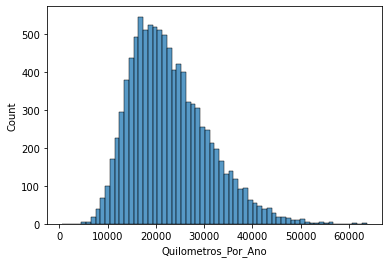

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dados.Quilometros_Por_Ano)

<AxesSubplot:xlabel='Idade', ylabel='Count'>

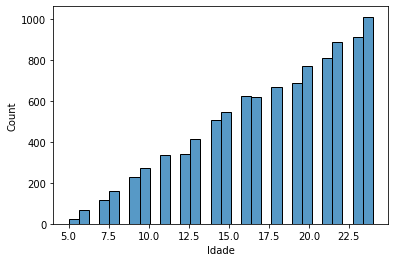

In [ ]:
sns.histplot(dados.Idade)

<AxesSubplot:xlabel='Preco', ylabel='Count'>

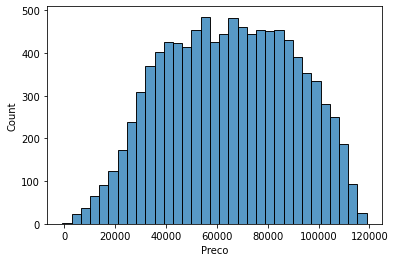

In [ ]:
sns.histplot(dados.Preco)

Podemos ver que tirando a variável idade, as demais variáveis explicativas tem distribuição normal. vamos analisar o gráfico 3D das 3variáveis juntas

In [ ]:
!pip3 install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 0, 'Quilometros Por Ano')

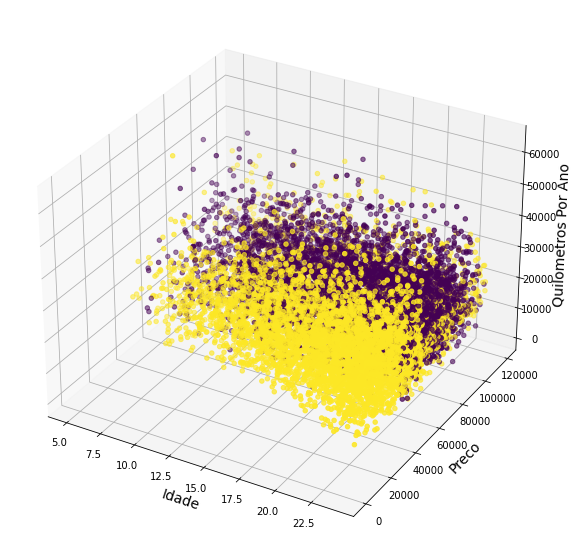

In [ ]:
#Devemos rodar esse código para habilitar a opcao dentro do colab, para que se plote graficos 3d interativos
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

#Definindo os 3 eixos

x = dados.Idade
y = dados.Preco
z = dados.Quilometros_Por_Ano

fig = plt.figure()
fig.set_size_inches(16,10)

grafico = fig.add_subplot(111, projection = "3d")

grafico.scatter(x,y, z, c= dados.Vendido,  )
grafico.set_xlabel("Idade", fontsize = 14)
grafico.set_ylabel("Preco", fontsize = 14)
grafico.set_zlabel("Quilometros Por Ano", fontsize = 14)

Conseguimos perceber que existe um região do espaço onde existem somemente pontos (carros) vendidos, que a região de rexo. Vamos usar o modelo de classificação de máquina de vetores de suporte não linear para traçar Hipleplanos nesse plano tridimencional que separa as classes:

#Implementando SVM Não Linear

Como já foi visto, para que possamos aplicar hipeplano não lineares devemos padronizar as variáveis explicativas/features numa mesma escala! Vamos fazer isso:

In [ ]:
x = dados[["Idade", "Preco", "Quilometros_Por_Ano"]]
y = dados["Vendido"]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 10
np.random.seed(SEED)

x_treino_raw, x_teste_raw, y_treino, y_teste = train_test_split(x, y, stratify= y, test_size=0.25)

escala = StandardScaler()
escala.fit(x_treino_raw)
x_treino = escala.transform(x_treino_raw)
x_teste = escala.transform(x_teste_raw)

Visualizando a nova escala:

In [ ]:
print("Preco padronizado: ", x_treino[:,1].max(), x_treino[:,1].min())
print("Preco NAO padronizado: ", x_treino_raw["Preco"].max(), x_treino_raw["Preco"].min())

Preco padronizado:  2.1562982589352 -2.5900396114382844
Preco NAO padronizado:  118929.72 -840.36


Veja que, para a variável Preco que antes tinha a maior escala entre as variáveis explicativas, agora nossa escala fica entre [2.5,-2.5]

Vamos treinar nosso modelo de máquinas de vetores de suporte não linear com as features padronizadas:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

modelo_vendas_svm = SVC(gamma = "auto")
modelo_vendas_svm.fit(x_treino, y_treino)
previsoes_vendas_svm = modelo_vendas_svm.predict(x_teste)

acuracia = accuracy_score(previsoes_vendas_svm, y_teste)*100
print("Acurácia do modelo svm : %.2f%%" % acuracia)

Acurácia do modelo svm : 75.84%


In [ ]:
confusion_matrix(y_teste, previsoes_vendas_svm)

array([[ 785,  265],
       [ 339, 1111]])

<AxesSubplot:>

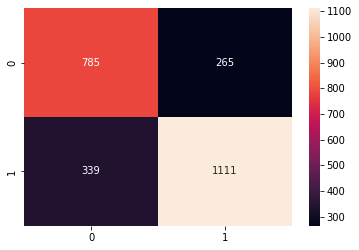

In [ ]:
sns.heatmap(confusion_matrix(y_teste, previsoes_vendas_svm), annot = True, fmt="d")
#sns.heatmap(confusion_matrix(y_teste, previsoes_sites), annot = True, fmt="d"  )

#Comparando com Modelos Dummys/Bobos

Mas benévolo, será que 75% de acurácia realmente é um número bom para este problema? A maioria das pessoas pensaria que é sim... Mas sempre devemos comprar a acurácia do nosso modelo com a acurácia do modelo "bobo", isto é, comparar com a acurácia do modelo do chute!

Aqui vem o 2 grande erro... Pensar que a acurácia do modelo do chute sempre será próximo de 50%... Isso nem sempre é certo, aliás, somente será correto se a probabilidade de sucesso e fracasso forem 50%, que é o caso do lançamento da moeda.

2 caracteristicas podem mudar essa probaiblidade de 50%:

- Dados desbalanceados.
  - Se na minha base de dados eu tenho mais exemplos de um classe do que de outra, naturalmente a acurácia do chute vai tender acertar mais para os casos que estão na classe majoritária.

 - As probabilidades de sucesso e fracasso são diferentes, logo existe uma maior probabilidade de ocorrencia para uma das classes.

Por esses motivos, existem casos onde o teste com o modelo Bobo = Dummy pode passar de 50%. Agora vamos instanciar um modelo Dummy/Bobo já pronto do sklearn que foi feito justamente para essa comparação! O modelo se chama DummyClassifier e ele sempre terá as mesma probabilidades de chute para cada classe dentro da variável denepenete.

Existem vários tipos de classificadores Dummy, mas o mais usados são dois:

- DummyClassifier stratificado.
 - Como o nome já sugere, ele vai levar em conta o desbalaceamento de classes dentro da variável dependente Y. Por exemplo, se eu tiver um desbalanceamento de 70% para 0 e 30% para 1, o classificador Dummy vai ter para seu chute, uma probabilidade de 70% de classificar como 0 e uma probabilidade de 30% de classificar como 1.
 - Isse ajuste do modelo, faz com que o modelo Bobo não seja tão bobo (mais ainda é bobo, pois esse modelo para treinar apenas conta a porcetagem de desbalanço das classes), logo ele tende a acertar mais que o modelo que chuta tudo 1 ou tudo 0.
 - Se nosso modelo que é mais rebuscado não conseguir ser melhor que este modelo simplista, podemos afirmar que nosso modelo não é eficás.



- DummyClassifier Most Frequent
  - Neste caso, o nosso modelo faz um contagem de frequência das classificações dentro da variável  dependente Y e a classificação que tem  a maior frequência é escolhida para o chute fixo. Isto é, somente iremos fazer uma classificação.
  - Por exemplo, se eu tiver mais 1 que 0 no meu Y, o DummyClassifier vai chutar tudo 1. Veja que também é um modelo de classificação bobo, mas... É mais inteligente (acerta mais) que somente chutar 1 ou 0 com 50% para cada um.

Vamos utilizar os dois:

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy = "stratified")
dummy_stratified.fit(x_treino, y_treino)
previsoes_dummy = dummy_stratified.predict(x_teste)

acuracia = accuracy_score(y_teste, previsoes_dummy)*100
print("Acuracia modelo Dummy Stratified : %.2f%%" % acuracia)

Acuracia modelo Dummy Stratified : 52.72%


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy = "most_frequent")
dummy_stratified.fit(x_treino, y_treino)
previsoes_dummy = dummy_stratified.predict(x_teste)

acuracia = accuracy_score(y_teste, previsoes_dummy)*100
print("Acuracia modelo Dummy Stratified : %.2f%%" % acuracia)

Acuracia modelo Dummy Stratified : 58.00%


Podemos ver que, o classificar dummy com maior acurácia é de maior frequência. Logo nosso modelo de Máquina de Vetores de Suporte deve ter uma acurácia maior que ela, o que de fato tem, ele tem 75% de acurácia!